In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
circle = pd.read_csv('원형교차로_사고.csv')

In [3]:
circle['NUMPOINTS'].describe()

count    1410.000000
mean        2.515603
std         4.252846
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        37.000000
Name: NUMPOINTS, dtype: float64

In [4]:
import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

Text(0.5, 1.0, '원형교차로 내 사고 건 수')

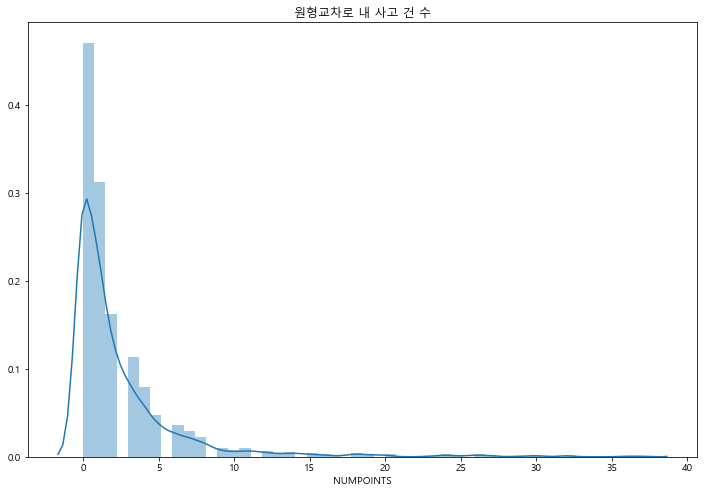

In [5]:
def set_font(font_file='malgun.ttf'): # 한글 출력
    font_dir = 'c:/Windows/Fonts/'
    font_name = fm.FontProperties(fname=os.path.join(font_dir, font_file)).get_name()
    rc('font', family=font_name)
set_font()

plt.figure(figsize=(12,8))
sns.distplot(circle['NUMPOINTS'])
plt.title('원형교차로 내 사고 건 수')

- 0과 5 이하에 몰려있음을 알 수 있다

In [6]:
import folium
southkorea_map = folium.Map(location=[36.55,126.983333 ], zoom_start=7)

for lat, lon,sago in zip(circle['위도'], circle['경도'],circle['NUMPOINTS']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                      popup =('number of accident: ' + str(sago) + '<br>'),
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(southkorea_map)
southkorea_map

In [7]:
southkorea_map.save('원형교차로 사고건수.html')